Importaciones y carga de datos limpios

In [6]:
import os
os.chdir("..")
os.getcwd()

'/Users/oscarmauriciomoraarroyo/proyecto_lyapunov_chagas'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

clean_path = "data/clean/chagas_clean.csv"
agg_path = "data/clean/chagas_prepared.csv"

df = pd.read_csv(clean_path)
agg = pd.read_csv(agg_path)

df.head(), agg.head()

(   CONSECUTIVE  COD_EVE     FEC_NOT  SEMANA   ANO  EDAD  UNI_MED  \
 0     10797442      205  2024-10-22      43  2024    55        1   
 1     10797490      205  2024-10-26      43  2024    75        1   
 2     10797466      205  2024-07-26      30  2024    69        1   
 3     10797488      205  2024-03-11      11  2024    70        1   
 4     10797486      205  2024-05-10      11  2024    61        1   
 
   Departamento_residencia Municipio_residencia Departamento_ocurrencia  \
 0                  BOYACA           MIRAFLORES                  BOYACA   
 1               SANTANDER              MOGOTES               SANTANDER   
 2                  BOYACA     SAN JOSE DE PARE                  BOYACA   
 3               SANTANDER               GUEPSA               SANTANDER   
 4               SANTANDER          BUCARAMANGA               SANTANDER   
 
   Municipio_ocurrencia Departamento_Notificacion Municipio_notificacion  
 0               BERBEO                    BOYACA        

Bloque A. Dimensiones y estructura básica

In [8]:
df.shape, agg.shape

((907, 13), (629, 5))

In [9]:
df.dtypes

CONSECUTIVE                   int64
COD_EVE                       int64
FEC_NOT                      object
SEMANA                        int64
ANO                           int64
EDAD                          int64
UNI_MED                       int64
Departamento_residencia      object
Municipio_residencia         object
Departamento_ocurrencia      object
Municipio_ocurrencia         object
Departamento_Notificacion    object
Municipio_notificacion       object
dtype: object

In [10]:
df.isna().mean().sort_values(ascending=False).head(15)

CONSECUTIVE                  0.0
COD_EVE                      0.0
FEC_NOT                      0.0
SEMANA                       0.0
ANO                          0.0
EDAD                         0.0
UNI_MED                      0.0
Departamento_residencia      0.0
Municipio_residencia         0.0
Departamento_ocurrencia      0.0
Municipio_ocurrencia         0.0
Departamento_Notificacion    0.0
Municipio_notificacion       0.0
dtype: float64

Bloque B. Distribución temporal

Casos por ano

In [11]:
df["ANO"].value_counts().sort_index()

ANO
2024    907
Name: count, dtype: int64

Serie semanal agregada

In [12]:
serie_semana = (
    agg.groupby(["ANO", "SEMANA"])["casos"]
    .sum()
    .reset_index()
    .sort_values(["ANO", "SEMANA"])
)

serie_semana.head()

,ANO,SEMANA,casos
0,2024,1,37
1,2024,2,18
2,2024,3,19
3,2024,4,18
4,2024,5,21


Gráfico simple de incidencia semanal

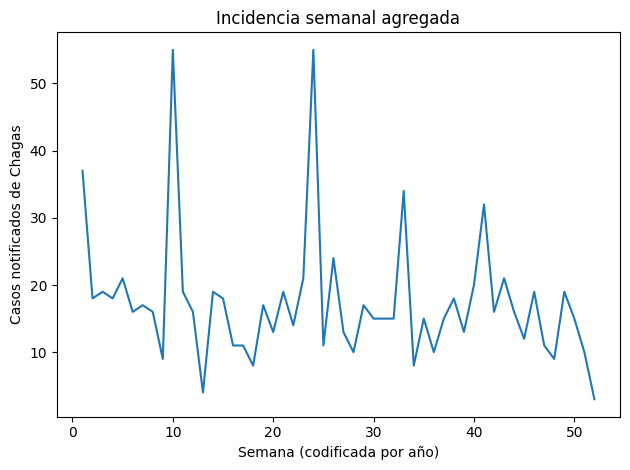

In [13]:
plt.figure()
x = serie_semana["SEMANA"] + 100 * (serie_semana["ANO"] - serie_semana["ANO"].min())
plt.plot(x, serie_semana["casos"])
plt.xlabel("Semana (codificada por año)")
plt.ylabel("Casos notificados de Chagas")
plt.title("Incidencia semanal agregada")
plt.tight_layout()
plt.show()

Bloque C. Distribución espacial

Casos por departamento de residencia

In [14]:
dept_res = (
    df.groupby("Departamento_residencia")["CONSECUTIVE"]
    .count()
    .sort_values(ascending=False)
)

dept_res.head(15)

Departamento_residencia
SANTANDER          172
BOYACA             143
CASANARE           133
CESAR              132
NORTE SANTANDER     76
GUAJIRA             70
ARAUCA              57
BOGOTA              17
CUNDINAMARCA        17
META                15
CHOCO               12
TOLIMA               9
ANTIOQUIA            8
GUAVIARE             7
HUILA                6
Name: CONSECUTIVE, dtype: int64

Top municipios por casos (residencia)

In [15]:
top_mpios_res = (
    agg.groupby(["Departamento_residencia", "Municipio_residencia"])["casos"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_mpios_res

Departamento_residencia  Municipio_residencia
CESAR                    VALLEDUPAR              117
CASANARE                 YOPAL                    65
GUAJIRA                  SAN JUAN DEL CESAR       57
BOYACA                   MONIQUIRA                48
SANTANDER                BUCARAMANGA              40
NORTE SANTANDER          CUCUTA                   27
CASANARE                 AGUAZUL                  24
ARAUCA                   SARAVENA                 21
BOYACA                   CUBARA                   20
BOGOTA                   BOGOTA                   17
BOYACA                   MIRAFLORES               17
SANTANDER                MOGOTES                  17
                         FLORIDABLANCA            14
BOYACA                   CHITARAQUE               14
ARAUCA                   TAME                     13
Name: casos, dtype: int64

Bloque D. Indicio de migración (residencia vs ocurrencia)

Proporción de casos con municipio distinto

In [16]:
migracion_flag = (
    df["Municipio_residencia"] != df["Municipio_ocurrencia"]
)

migracion_flag.mean()

np.float64(0.12017640573318633)

Tabla de conteo

In [17]:
tabla_migracion = (
    df.assign(migracion=migracion_flag)
      .groupby("migracion")["CONSECUTIVE"]
      .count()
)

tabla_migracion

migracion
False    798
True     109
Name: CONSECUTIVE, dtype: int64